In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'news images/train_set'
validation_dir = 'news images/test_set'
BATCH_SIZE = 32
IMG_SIZE = 250
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='binary')
from keras import layers
from keras import models
from tensorflow import keras
from keras import optimizers
 
keras.backend.clear_session()

Found 706 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [6]:
total_train = train_generator.n
total_test = validation_generator.n

In [2]:
import os
import cv2

DIRECTORY = "Fake-News-Image-Detector-1"
CATEGORIES = ["fake", "real"]
IMG_SIZE = 250
sets = ['train', 'test', 'valid']
train_set = []
test_set = []
valid_set = []

for category in CATEGORIES:
    for set in sets:
        datasets = os.path.join(DIRECTORY, set, category)
        label = CATEGORIES.index(category)
        for img in os.listdir(datasets):
            img_path = os.path.join(datasets, img)
            img_arr = cv2.imread(img_path)
            #img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            img_arr = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
            if set == 'train':
                train_set.append([img_arr, label])
            if set == 'test':
                test_set.append([img_arr, label])
            if set == 'valid':
                valid_set.append([img_arr, label])
import numpy as np
X_train = np.array([arr[0] for arr in train_set])/255
y_train = np.array([arr[1] for arr in train_set])

X_test = np.array([arr[0] for arr in test_set])/255
y_test = np.array([arr[1] for arr in test_set])

X_valid = np.array([arr[0] for arr in valid_set])/255
y_valid = np.array([arr[1] for arr in valid_set])

In [3]:
X_train.shape

(2691, 250, 250, 3)

In [4]:
import tensorflow as tf

pre_trained_model = tf.keras.applications.VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")

In [5]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [6]:
from keras import regularizers   
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)



In [7]:
model = tf.keras.Model(pre_trained_model.input, x)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

STAMP = f'VGG16_MODEL'
early_stopping =EarlyStopping(monitor='val_loss', patience=7)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

In [10]:
tf.keras.backend.clear_session()

In [11]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_valid, y_valid),
                    batch_size=32)
#, 

#model.load_weights(bst_model_path)

Epoch 1/50
85/85 [==============================] - 34s 281ms/step - loss: 0.5914 - acc: 0.6897 - val_loss: 0.6383 - val_acc: 0.6459
Epoch 2/50
85/85 [==============================] - 18s 213ms/step - loss: 0.5078 - acc: 0.7507 - val_loss: 0.4100 - val_acc: 0.8366
Epoch 3/50
85/85 [==============================] - 18s 213ms/step - loss: 0.4462 - acc: 0.7975 - val_loss: 0.3967 - val_acc: 0.8444
Epoch 4/50
85/85 [==============================] - 19s 229ms/step - loss: 0.4418 - acc: 0.7982 - val_loss: 0.5823 - val_acc: 0.7315
Epoch 5/50
85/85 [==============================] - 21s 242ms/step - loss: 0.4177 - acc: 0.8075 - val_loss: 0.3572 - val_acc: 0.8482
Epoch 6/50
85/85 [==============================] - 21s 243ms/step - loss: 0.3907 - acc: 0.8205 - val_loss: 0.4142 - val_acc: 0.8210
Epoch 7/50
85/85 [==============================] - 21s 244ms/step - loss: 0.3895 - acc: 0.8168 - val_loss: 0.3822 - val_acc: 0.8327
Epoch 8/50
85/85 [==============================] - 20s 236ms/step - 

In [14]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 176ms/step - loss: 0.3770 - acc: 0.8992


[0.37695077061653137, 0.8992248177528381]

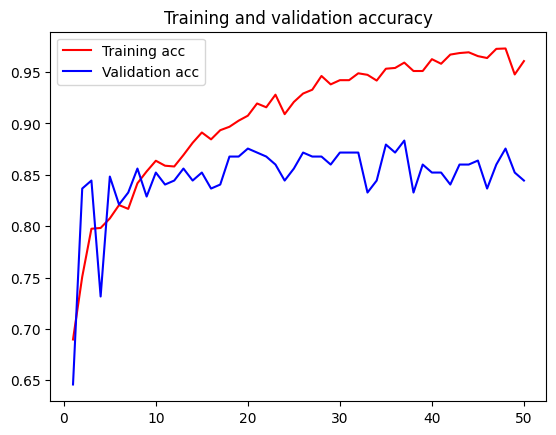

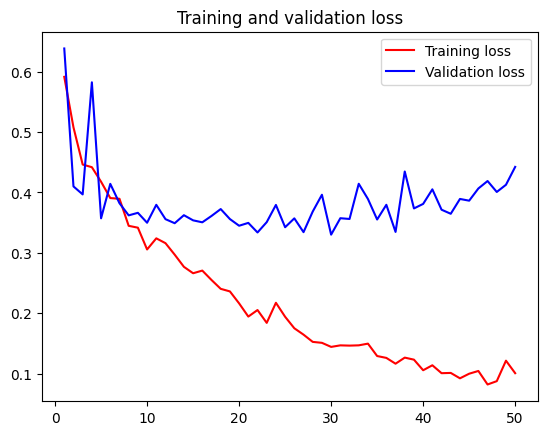

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
model_json = model.to_json()
with open("classification models/vgg16/VGG_Skin_Classifier.json", "w") as json_file:
    json_file.write(model_json)

model.save("classification models/vgg16/VGG_Skin_Classifier.h5")
print("Saved model to disk")
model.save_weights("classification models/vgg16/VGG_Skin.h5")

Saved model to disk


In [13]:
model.load_weights(bst_model_path)
result = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("test_loss, test accuracy",result)

#model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(train_generator,batch_size=BATCH_SIZE)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("Testing Accuracy:  {:.4f}".format(accuracy))


6/6 [==============================] - 6s 1s/step - loss: 0.3935 - acc: 0.8409
test_loss, test accuracy [0.3935054540634155, 0.8409090638160706]
23/23 [==============================] - 14s 594ms/step - loss: 0.3551 - acc: 0.8612
Training Accuracy: 0.8612
6/6 [==============================] - 2s 234ms/step - loss: 0.3935 - acc: 0.8409
Testing Accuracy:  0.8409


Epoch 1/100
21/21 [==============================] - 16s 717ms/step - loss: 5.8490 - acc: 0.5291 - val_loss: 5.6303 - val_acc: 0.5125
Epoch 2/100
21/21 [==============================] - 15s 704ms/step - loss: 5.5735 - acc: 0.5663 - val_loss: 5.3837 - val_acc: 0.5312
Epoch 3/100
21/21 [==============================] - 16s 756ms/step - loss: 5.3082 - acc: 0.5931 - val_loss: 5.1409 - val_acc: 0.6062
Epoch 4/100
21/21 [==============================] - 15s 735ms/step - loss: 5.0874 - acc: 0.6289 - val_loss: 4.9253 - val_acc: 0.6562
Epoch 5/100
21/21 [==============================] - 15s 709ms/step - loss: 4.8691 - acc: 0.6766 - val_loss: 4.7263 - val_acc: 0.7250
Epoch 6/100
21/21 [==============================] - 15s 700ms/step - loss: 4.6784 - acc: 0.6870 - val_loss: 4.5631 - val_acc: 0.6938
Epoch 7/100
21/21 [==============================] - 15s 713ms/step - loss: 4.4976 - acc: 0.6811 - val_loss: 4.3600 - val_acc: 0.7875
Epoch 8/100
21/21 [==============================] - 15s 734ms

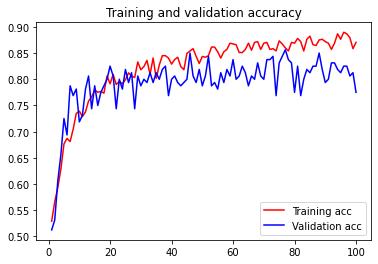

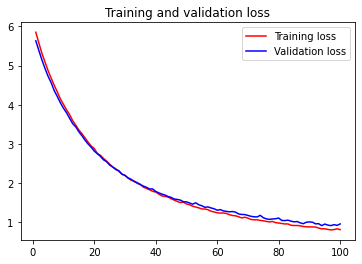

In [15]:
from keras import regularizers

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(pre_trained_model.input, x)
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

from keras.callbacks import EarlyStopping, ModelCheckpoint

STAMP = f'VGG16_MODEL_2'
early_stopping =EarlyStopping(monitor='val_loss', patience=10)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)
history = model.fit(train_generator,
steps_per_epoch=(703//BATCH_SIZE),
epochs = 100,
validation_data=validation_generator,
validation_steps=(175//BATCH_SIZE),
batch_size = BATCH_SIZE,
verbose = 1, callbacks=[early_stopping, model_checkpoint])

model.load_weights(bst_model_path)
result = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("test_loss, test accuracy",result)

#model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(train_generator,batch_size=BATCH_SIZE)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator,batch_size=BATCH_SIZE)
print("Testing Accuracy:  {:.4f}".format(accuracy))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
model_json = model.to_json()
with open("classification models/vgg16/VGG_Skin_Classifier81.json", "w") as json_file:
    json_file.write(model_json)

model.save("classification models/vgg16/VGG_Skin_Classifier81.h5")
print("Saved model to disk")
model.save_weights("classification models/vgg16/VGG_Skin81.h5")

Saved model to disk
